In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
df_train = pd.read_csv('train.csv')
df_train.shape

(891, 12)

In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.shape

(891, 12)

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
def age_aproxx(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if pclass == 1:
            return 37
        elif pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [12]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [13]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_aproxx, axis=1)

In [14]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [17]:
# Converting Sex and Embarked to categorical values
df_train_dummied = pd.get_dummies(df_train, columns=['Sex'])

In [18]:
df_train_dummied = pd.get_dummies(df_train, columns=['Embarked'])

In [19]:
df_train_dummied.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1


<AxesSubplot:>

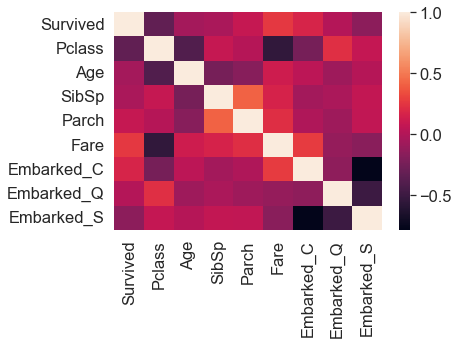

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [21]:
used_features = ['Pclass','Age','SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S']
x = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 8)
(267, 8)
(622,)
(267,)


In [24]:
LG = LogisticRegression

In [28]:
LG.fit(x_train,y_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [46]:
Y_pred= LG.predict(x_test)

TypeError: predict() missing 1 required positional argument: 'X'

In [45]:
metrics.confusion_matrix(Y_pred,y_test)

NameError: name 'Y_pred' is not defined

In [47]:
matrics.accuracy_score(y-test,Y_pred)

NameError: name 'matrics' is not defined

In [ ]:
print(classification_report(y_test,Y_pred)) #lG.coef_,LG.intercept_